In [2]:
import os
for dirname, _, filenames in os.walk('E:\mini proj'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\mini proj\contractions.csv
E:\mini proj\dataset.csv


In [3]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

In [4]:
DATASET_COLUMNS = ["label", "ids", "date", "flag", "user", "tweet"]
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv("E:\mini proj\dataset.csv", encoding =DATASET_ENCODING , names=DATASET_COLUMNS)
df.head()

,label,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.drop(['ids','date','flag','user'],axis=1,inplace=True)

In [6]:
df.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


<AxesSubplot:xlabel='label', ylabel='count'>

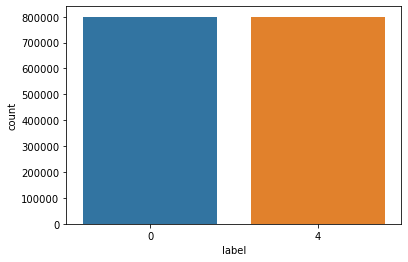

In [7]:
import seaborn as sns
sns.countplot(x='label',data=df)

In [8]:
df['label'].unique()

array([0, 4], dtype=int64)

In [9]:
df["label"].replace({4:1}, inplace=True)

In [10]:
df['label'].unique()

array([0, 1], dtype=int64)

In [11]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [12]:
df.shape

(1600000, 2)

In [13]:
df.describe()

,label
count,1600000.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


In [14]:
df['label'].dtype

dtype('int64')

In [15]:
df['tweet'].dtype

dtype('O')

In [16]:
df['label'] = df['label'].apply(str)

In [17]:
df['label'].dtype

dtype('O')

In [18]:
df

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


In [19]:
positives = df['label'][df.label == '1' ]
negatives = df['label'][df.label == '0' ]
print('Positive tweets {}'.format(len(positives)))
print('Negative tweets {}'.format(len(negatives)))

Positive tweets 800000
Negative tweets 800000


In [20]:
df['tweet'].dtype

dtype('O')

In [21]:
df['label'].dtype

dtype('O')

In [22]:
df['dub_tweet']=df['tweet'].astype(str)

In [23]:
df

,label,tweet,dub_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time!!! ...


In [24]:
 df['tweet'].dtype

dtype('O')

In [25]:
df

,label,tweet,dub_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time!!! ...


In [26]:
df['dub_tweet'].dtype

dtype('O')

In [28]:
df.head()

,label,tweet,dub_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [31]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'ours', 'himself', "you'd", 'yourselves', 'we', 'but', 'doesn', 'now', 'of', 'was', 'there', 'only', 'each', "haven't", "needn't", 'who', 'wasn', 'he', 'because', 'd', 'above', 'at', 'about', 'your', 'down', 'until', 'me', 'i', 'them', "hasn't", "wouldn't", "you're", 'o', 'again', 'should', 'those', 'over', "isn't", "weren't", 'mightn', 'has', 'haven', 'very', 'ain', 'have', 'to', 'shouldn', 'between', 're', "won't", 'the', 'his', "mightn't", 'once', 'does', 'can', 'no', 'same', 't', 'this', 'yours', 'their', 'while', "it's", 'if', 'you', 'into', 'm', 'won', "you'll", 'in', 'under', 'just', 'all', 'shan', "don't", 'didn', 'll', 'out', 'don', "shan't", 'as', 'they', 'my', 'her', 'any', 'both', 'most', 'own', 'needn', 'she', 'from', 'that', 'itself', 'or', 'isn', 'below', 'had', 'doing', "hadn't", 'up', 'before', 'other', "didn't", 'and', "mustn't", 'against', 'here', 'whom', 'these', "doesn't", 'having', 'mustn', 'been', 'for', 'themselves', 'is', "should've", 'a', "aren't", 'be', 'am'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [ ]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
    # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
        if len(w)>1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    return ' '.join(finalwords)

In [ ]:
df